In [1]:
from keras.datasets import mnist  
from keras.utils import np_utils  
import numpy as np  

import sys
sys.path.append('../')
from util.my_plot import plot_single, plot_batch, show_train_history, plot_images_labels_prediction, plot_image, plot_value_array
  

Using TensorFlow backend.


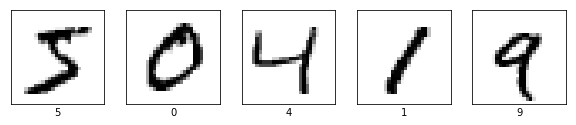

In [2]:
# Read MNIST data  
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()  

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_batch(X_Train, y_Train,class_names ,5)
    

In [3]:
# Translation of data  
X_Train40 = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')  
X_Test40 = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')  

X_Train40.shape

(60000, 28, 28, 1)

In [4]:
y_Train.shape

(60000,)

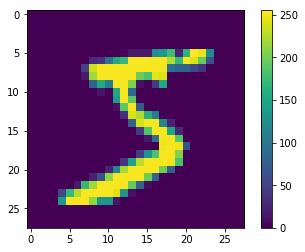

In [5]:
plot_single(X_Train40[0].reshape(28,28))

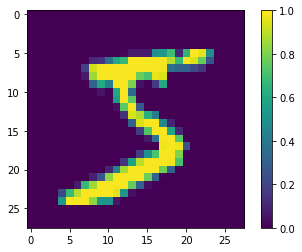

In [6]:
# Standardize feature data  
X_Train40_norm = X_Train40 / 255  
X_Test40_norm = X_Test40 /255  
plot_single(X_Train40_norm[0].reshape(28,28))

# 建立模型

In [7]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
import tensorflow as tf

In [8]:
# Convolution layer

model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16, kernel_size=(5,5),  
                 padding='same',input_shape=(28,28,1), activation=tf.nn.relu))  
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Create CN layer 2  
model.add(Conv2D(filters=36, kernel_size=(5,5),
                 padding='same', activation=tf.nn.relu))  
  
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Add Dropout layer  
model.add(Dropout(0.25))  

In [9]:
# MLP
model.add(Flatten())
model.add(Dense(256, activation=tf.nn.relu, kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(10, activation=tf.nn.softmax, kernel_initializer='normal'))

In [10]:
# 定義訓練方式  
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
model.summary()  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               451840    
__________

# 訓練模型

In [ ]:
# 開始訓練  
train_history = model.fit(x=X_Train40_norm, y=y_Train, validation_split=0.2,  
                          epochs=10, batch_size=300, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 22s - loss: 0.4604 - acc: 0.8575 - val_loss: 0.1048 - val_acc: 0.9679
Epoch 2/10
 - 22s - loss: 0.1262 - acc: 0.9607 - val_loss: 0.0678 - val_acc: 0.9799
Epoch 3/10
 - 22s - loss: 0.0917 - acc: 0.9710 - val_loss: 0.0573 - val_acc: 0.9823
Epoch 4/10
 - 22s - loss: 0.0707 - acc: 0.9778 - val_loss: 0.0464 - val_acc: 0.9857
Epoch 5/10
 - 22s - loss: 0.0610 - acc: 0.9810 - val_loss: 0.0468 - val_acc: 0.9859
Epoch 6/10
 - 22s - loss: 0.0534 - acc: 0.9833 - val_loss: 0.0389 - val_acc: 0.9881
Epoch 7/10
 - 22s - loss: 0.0476 - acc: 0.9852 - val_loss: 0.0374 - val_acc: 0.9893
Epoch 8/10
 - 22s - loss: 0.0436 - acc: 0.9864 - val_loss: 0.0342 - val_acc: 0.9898
Epoch 9/10
 - 22s - loss: 0.0397 - acc: 0.9876 - val_loss: 0.0320 - val_acc: 0.9905
Epoch 10/10


# 以圖形顯示訓練過程

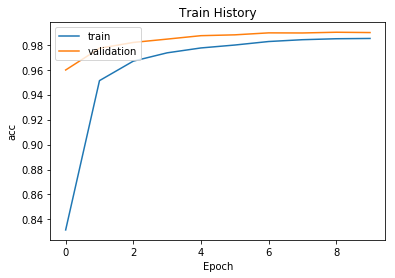

In [12]:
show_train_history(train_history, 'acc', 'val_acc')  

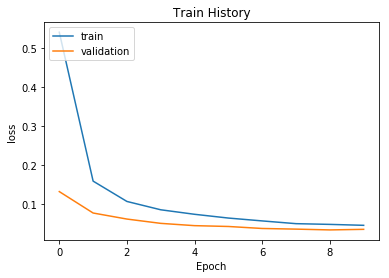

In [13]:
show_train_history(train_history, 'loss', 'val_loss')  

# 評估模型準確率

In [14]:
scores = model.evaluate(X_Test40_norm, y_Test)  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

10000/10000 [==============================] - 1s 82us/step
	[Info] Accuracy of testing data = 98.9%


# 進行預測

In [15]:
print("\t[Info] Making prediction of X_Test4D_norm")  
prediction = model.predict_classes(X_Test40_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))

	[Info] Making prediction of X_Test4D_norm
()
	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 4 4 2]



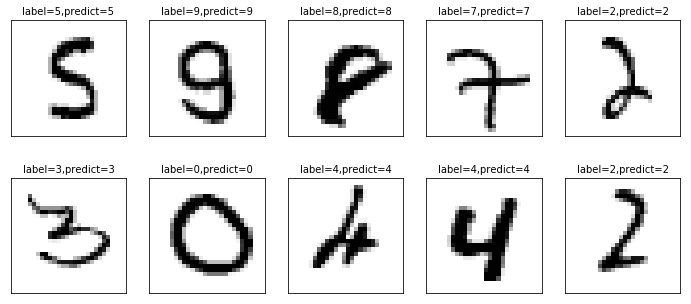

In [16]:
plot_images_labels_prediction(X_Test, y_Test, prediction, idx=240)  

In [17]:
import pandas as pd  
print("\t[Info] Display Confusion Matrix:")  
pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict'])  

	[Info] Display Confusion Matrix:


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,1,0,0,0,2,1,1,0
1,0,1130,2,0,0,1,2,0,0,0
2,2,3,1022,0,0,0,0,4,1,0
3,0,0,2,999,0,6,0,1,2,0
4,0,0,0,0,978,0,1,2,0,1
5,2,0,0,4,0,883,2,1,0,0
6,3,1,0,0,1,4,948,0,1,0
7,1,0,5,2,0,0,0,1019,1,0
8,2,0,3,1,1,1,3,2,959,2


# 針對位移過的圖進行預測

/usr/local/lib/python2.7/dist-packages/keras_preprocessing/image.py:1213: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')
/usr/local/lib/python2.7/dist-packages/keras_preprocessing/image.py:1437: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


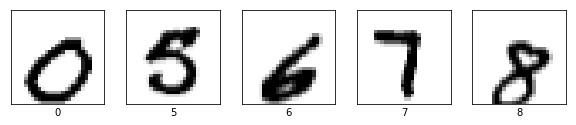

In [18]:
from util.my_plot import generate_shift_mnist_data
shift_img, shift_img_label = generate_shift_mnist_data(10000)
plot_batch(shift_img, shift_img_label,class_names ,5)


In [19]:
shift_img = shift_img.reshape(shift_img.shape[0], 28, 28, 1).astype('float32')  
aa_norm = shift_img /255  

scores = model.evaluate(aa_norm, shift_img_label)
print("Accuracy of generated shift data = {:2.1f}%".format(scores[1]*100.0))

10000/10000 [==============================] - 1s 86us/step
Accuracy of generated shift data = 68.3%
